<a href="https://colab.research.google.com/github/deepavasanthkumar/deepavasanthkumar/blob/main/DuckDB_JupySQL_and_Pandas_in_Colab_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install --quiet duckdb
!pip install --quiet jupysql
!pip install --quiet duckdb-engine
!pip install --quiet pandas
!pip install --quiet matplotlib

In [25]:
import duckdb
import pandas as pd

%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [26]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [27]:
%sql duckdb:///:memory:
# %sql duckdb:///path/to/file.db

In [28]:
%sql SELECT 'Off and flying!' as a_duckdb_column

,a_duckdb_column
0,Off and flying!


In [29]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 5

,schema_name,function_name
0,pg_catalog,shobj_description
1,pg_catalog,shobj_description
2,pg_catalog,shobj_description
3,pg_catalog,pg_typeof
4,pg_catalog,pg_typeof


In [30]:
%sql my_df << SELECT 'Off and flying!' as a_duckdb_column
my_df


,a_duckdb_column
0,Off and flying!


In [31]:
input_df = pd.DataFrame.from_dict({"i":[1, 2, 3],
                                  "j":["Apple", "Mango", "Oranges"]})

In [45]:
%sql SELECT * from input_df

,i,j
0,1,Apple
1,2,Mango
2,3,Oranges


In [32]:
%sql output_df << SELECT sum(i) as total_i FROM input_df
output_df

,total_i
0,6.0


In [33]:
%%sql
INSTALL httpfs;
LOAD httpfs;

,Success


Removing NULLs, if there exists any from j

<Axes: title={'center': 'input_df'}>

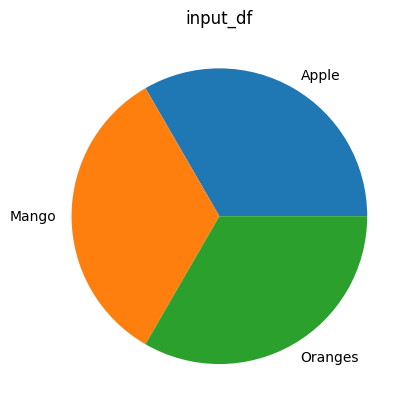

In [41]:
%sqlplot pie --table input_df --column j

In [35]:
from google.colab import files
uploaded = files.upload()

Saving userdata1.parquet to userdata1 (1).parquet


In [42]:
pandasdf = pd.read_parquet("userdata1.parquet")
pandasdf

,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 07:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 17:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 01:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,
3,2016-02-03 00:36:21,4,Denise,Riley,driley3@gmpg.org,Female,140.35.109.83,3576031598965625,China,4/8/1997,90263.05,Senior Cost Accountant,
4,2016-02-03 05:05:31,5,Carlos,Burns,cburns4@miitbeian.gov.cn,,169.113.235.40,5602256255204850,South Africa,,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2016-02-03 10:30:59,996,Dennis,Harris,dharrisrn@eepurl.com,Male,178.180.111.236,374288806662929,Greece,7/8/1965,263399.54,Editor,
996,2016-02-03 17:16:53,997,Gloria,Hamilton,ghamiltonro@rambler.ru,Female,71.50.39.137,,China,4/22/1975,83183.54,VP Product Management,
997,2016-02-03 05:02:20,998,Nancy,Morris,nmorrisrp@ask.com,,6.188.121.221,3553564071014997,Sweden,5/1/1979,NaN,Junior Executive,
998,2016-02-03 02:41:32,999,Annie,Daniels,adanielsrq@squidoo.com,Female,97.221.132.35,30424803513734,China,10/9/1991,18433.85,Editor,​


Removing NULLs, if there exists any from country

<Axes: title={'center': 'pandasdf'}>

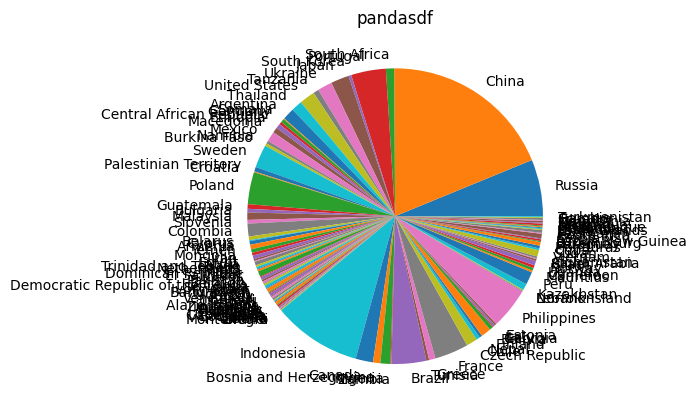

In [43]:
%sqlplot pie --table pandasdf --column country

Removing NULLs, if there exists any from gender

<Axes: title={'center': 'pandasdf'}, xlabel='gender', ylabel='Count'>

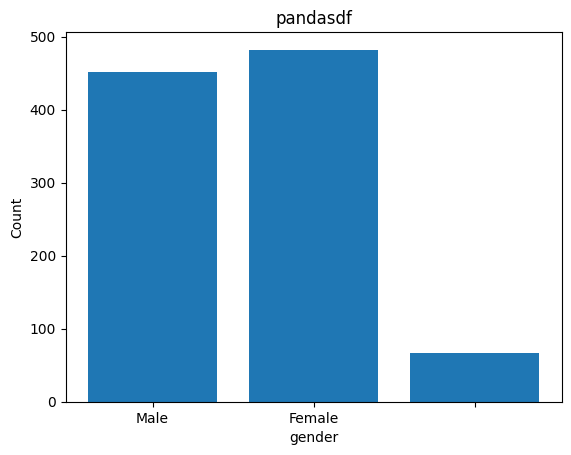

In [44]:
%sqlplot bar  --table pandasdf --column gender

<Axes: title={'center': "'gender' from 'userdata1.parquet'"}, xlabel='gender', ylabel='Count'>

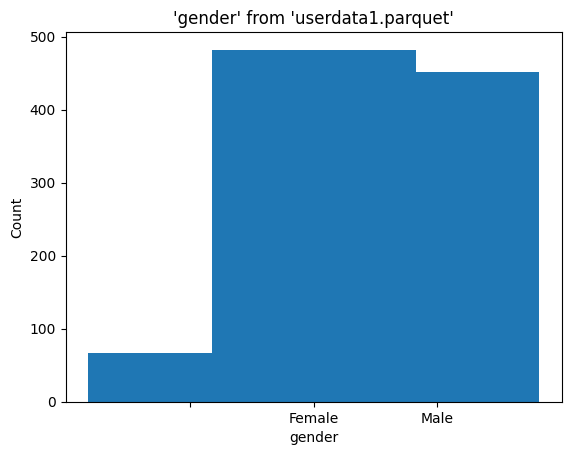

In [39]:
%sqlplot histogram --table userdata1.parquet --column gender

<Axes: title={'center': "'salary' from 'userdata1.parquet'"}, ylabel='salary'>

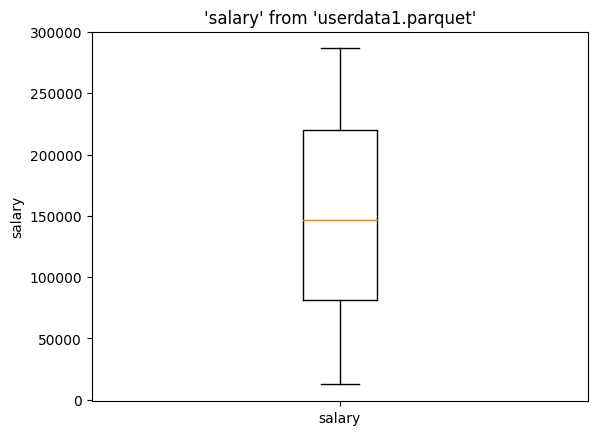

In [40]:
%sqlplot boxplot --table userdata1.parquet  --column salary